# RAMP on variable star type prediction


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
pd.set_option('display.max_columns', None)

In [11]:
import problem

X_df, y = problem.get_train_data()
X_test, y_test = problem.get_test_data()

e:\M1\datacamps\variable_stars_datacamp2024\problem.py:46: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vf_dict = vf_raw.applymap(csv_array_to_float).to_dict(orient='records')
e:\M1\datacamps\variable_stars_datacamp2024\problem.py:46: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vf_dict = vf_raw.applymap(csv_array_to_float).to_dict(orient='records')


**1. Data exploration (additional steps)**

In [14]:
X_df.head()

,patch_id,star_id_b,star_id_r,magnitude_b,magnitude_r,asc_d,asc_m,asc_s,dec_d,dec_m,dec_s,period,frequency,num_points_good_b,num_points_good_r,asym_b,asym_r,log_p_not_variable,sigma_flux_b,sigma_flux_r,quality,div_period,time_points_b,time_points_r,light_points_b,light_points_r,error_points_b,error_points_r,bkg_points_b,bkg_points_r,polltn_points_b,polltn_points_r
0,135.0,9613.0,10062.0,19.1458,18.8044,5.0,40.0,51.37,-70.0,13.0,58.78,2.35495,0.424637,123.0,124.0,1.277780,0.653333,-2.80984,36.1471,46.4916,1.0,7.0,"[290.3, 291.35, 322.25, 326.24, 345.18, 347.23...","[290.34, 291.31, 322.29, 326.28, 345.23, 347.1...","[19.15, 18.96, 18.86, 19.17, 18.96, 19.03, 19....","[18.75, 18.66, 18.5, 18.68, 18.77, 18.69, 18.7...","[0.13, 0.12, 0.12, 0.13, 0.13, 0.13, 0.13, 0.1...","[0.16, 0.25, 0.14, 0.17, 0.18, 0.23, 0.14, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.13, 0.13, 0.11, 0.11, 0.14, 0.19, 0.08, 0.1..."
1,271.0,4304.0,4708.0,17.6799,15.3077,5.0,28.0,51.55,-69.0,23.0,19.17,280.00000,0.003571,123.0,125.0,0.921875,1.777780,-14.51460,136.1020,1269.7400,2.0,2.0,"[290.3, 291.35, 322.25, 326.24, 345.18, 347.23...","[290.34, 291.31, 322.29, 326.28, 345.23, 347.1...","[17.7, 17.97, 17.83, 17.71, 17.6, 17.4, 17.46,...","[15.43, 15.66, 15.66, 15.5, 15.28, 15.28, 15.3...","[0.12, 0.1, 0.08, 0.09, 0.11, 0.09, 0.11, 0.12...","[0.1, 0.11, 0.09, 0.09, 0.06, 0.07, 0.06, 0.07...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.02, 0.02, 0.0, 0.0, 0.02, 0.02, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,295.0,8200.0,8739.0,19.3872,18.8606,5.0,27.0,7.89,-68.0,43.0,14.47,1.42264,0.702919,122.0,124.0,2.388890,1.883720,-6.50514,32.1775,48.2365,2.0,3.0,"[290.3, 291.35, 322.25, 326.24, 345.18, 347.23...","[290.34, 291.31, 322.29, 326.28, 345.23, 347.1...","[20.16, 19.37, 19.28, 19.53, 19.53, 19.95, 19....","[19.19, 18.81, 18.86, 19.06, 19.05, 18.89, 18....","[0.25, 0.14, 0.13, 0.16, 0.22, 0.26, 0.19, 0.2...","[0.27, 0.25, 0.17, 0.21, 0.24, 0.25, 0.15, 0.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0,...","[0.01, 0.01, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0....","[0.03, 0.03, 0.02, 0.02, 0.06, 0.11, 0.05, 0.0...","[0.06, 0.03, 0.03, 0.03, 0.05, 0.06, 0.02, 0.0..."
3,223.0,530.0,557.0,16.4751,15.5033,5.0,35.0,41.69,-70.0,56.0,13.25,193.54800,0.005167,124.0,124.0,0.252525,1.431370,-6.12045,368.7470,1026.6800,0.0,3.0,"[290.3, 291.35, 322.25, 326.24, 345.18, 347.23...","[290.34, 291.31, 322.29, 326.28, 345.23, 347.1...","[16.73, 16.3, 16.25, 16.38, 16.22, 16.07, 16.0...","[15.24, 15.55, 15.74, 15.69, 15.55, 15.37, 15....","[0.14, 0.12, 0.11, 0.18, 0.23, 0.16, 0.2, 0.16...","[0.25, 0.21, 0.13, 0.13, 0.12, 0.13, 0.12, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,354.0,10866.0,12022.0,17.8301,16.7286,5.0,21.0,50.48,-69.0,17.0,32.07,1.81622,0.550594,123.0,116.0,1.510200,0.633803,-2.07771,121.7490,318.9770,1.0,5.0,"[290.3, 291.35, 322.25, 326.24, 345.18, 347.23...","[290.34, 291.31, 322.29, 326.28, 345.23, 347.1...","[17.67, 17.51, 17.78, 17.73, 17.6, 17.87, 18.0...","[16.97, 16.88, 16.72, 16.67, 16.47, 17.12, 16....","[0.13, 0.1, 0.1, 0.1, 0.12, 0.1, 0.12, 0.14, 0...","[0.13, 0.14, 0.1, 0.1, 0.08, 0.18, 0.08, 0.08,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.02, 0.02, 0.02, 0.0, 0....","[0.19, 0.22, 0.13, 0.11, 0.11, 0.35, 0.05, 0.0..."


In [21]:
X_df.shape, X_test.shape

((2912, 32), (729, 32))

In [17]:
X_df.columns, X_df.columns.shape

(Index(['patch_id', 'star_id_b', 'star_id_r', 'magnitude_b', 'magnitude_r',
        'asc_d', 'asc_m', 'asc_s', 'dec_d', 'dec_m', 'dec_s', 'period',
        'frequency', 'num_points_good_b', 'num_points_good_r', 'asym_b',
        'asym_r', 'log_p_not_variable', 'sigma_flux_b', 'sigma_flux_r',
        'quality', 'div_period', 'time_points_b', 'time_points_r',
        'light_points_b', 'light_points_r', 'error_points_b', 'error_points_r',
        'bkg_points_b', 'bkg_points_r', 'polltn_points_b', 'polltn_points_r'],
       dtype='object'),
 (32,))

In [18]:
X_df.dtypes

patch_id              float64
star_id_b             float64
star_id_r             float64
magnitude_b           float64
magnitude_r           float64
asc_d                 float64
asc_m                 float64
asc_s                 float64
dec_d                 float64
dec_m                 float64
dec_s                 float64
period                float64
frequency             float64
num_points_good_b     float64
num_points_good_r     float64
asym_b                float64
asym_r                float64
log_p_not_variable    float64
sigma_flux_b          float64
sigma_flux_r          float64
quality               float64
div_period            float64
time_points_b          object
time_points_r          object
light_points_b         object
light_points_r         object
error_points_b         object
error_points_r         object
bkg_points_b           object
bkg_points_r           object
polltn_points_b        object
polltn_points_r        object
dtype: object

In [20]:
X_df.describe()

,patch_id,star_id_b,star_id_r,magnitude_b,magnitude_r,asc_d,asc_m,asc_s,dec_d,dec_m,dec_s,period,frequency,num_points_good_b,num_points_good_r,asym_b,asym_r,log_p_not_variable,sigma_flux_b,sigma_flux_r,quality,div_period
count,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000,2912.000000
mean,379.310783,5555.256525,5797.934066,18.399568,17.681157,4.880495,27.551168,30.187318,-68.453297,29.804945,30.337469,25.590458,0.457069,118.826923,117.505495,1.794533,1.170140,-4.845394,244.598474,380.934030,1.392857,3.984203
std,205.656061,3315.614898,3517.441510,1.448216,1.516306,0.324438,16.343975,17.519015,1.376253,17.345868,17.425474,84.048234,0.452079,7.170275,8.904083,0.976015,0.651768,4.032229,620.541468,639.890882,0.790395,2.259320
min,1.000000,3.000000,3.000000,13.300400,13.464300,4.000000,0.000000,0.000000,-71.000000,0.000000,0.030000,0.400617,0.001119,33.000000,11.000000,0.027778,0.017544,-21.558400,5.465160,12.347600,0.000000,1.000000
25%,228.000000,2684.250000,2767.000000,17.419425,16.177250,5.000000,12.000000,15.135000,-70.000000,15.000000,15.247500,1.673830,0.129715,117.000000,115.000000,1.087720,0.746426,-6.897305,28.485175,42.485100,1.000000,2.000000
50%,336.000000,5428.500000,5601.500000,18.990100,18.313000,5.000000,28.000000,30.525000,-69.000000,29.000000,30.635000,2.910530,0.343580,121.000000,120.000000,1.727270,1.054060,-4.101000,44.473250,75.814850,1.000000,4.000000
75%,564.000000,8401.000000,8695.000000,19.470400,18.952425,5.000000,39.000000,45.362500,-67.000000,45.000000,45.360000,7.709215,0.597432,123.000000,123.000000,2.416670,1.480000,-1.743043,176.032250,537.832500,2.000000,5.000000
max,782.000000,12570.000000,13881.000000,21.219700,20.346300,5.000000,59.000000,59.990000,-65.000000,59.000000,59.980000,893.617000,2.496150,124.000000,125.000000,12.111100,8.000000,0.386810,7697.550000,6878.070000,3.000000,16.000000


In [22]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2912 entries, 0 to 2911
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patch_id            2912 non-null   float64
 1   star_id_b           2912 non-null   float64
 2   star_id_r           2912 non-null   float64
 3   magnitude_b         2912 non-null   float64
 4   magnitude_r         2912 non-null   float64
 5   asc_d               2912 non-null   float64
 6   asc_m               2912 non-null   float64
 7   asc_s               2912 non-null   float64
 8   dec_d               2912 non-null   float64
 9   dec_m               2912 non-null   float64
 10  dec_s               2912 non-null   float64
 11  period              2912 non-null   float64
 12  frequency           2912 non-null   float64
 13  num_points_good_b   2912 non-null   float64
 14  num_points_good_r   2912 non-null   float64
 15  asym_b              2912 non-null   float64
 16  asym_r

[3 4 3 1 3]
0    rr_lyrae
1        mira
2    rr_lyrae
3      binary
4    rr_lyrae
dtype: object


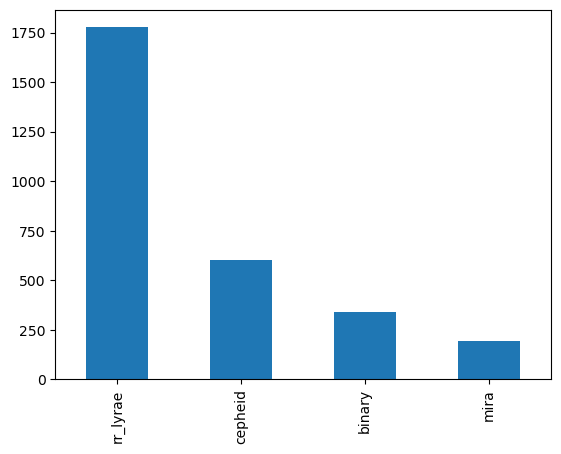

In [19]:
print(y[:5])
# labels
label_names = {1: 'binary', 2: 'cepheid', 3: 'rr_lyrae', 4: 'mira'}
labels = list(label_names.keys())
y_series = pd.Series(y).replace(label_names)
print(y_series.head())

_ = y_series.value_counts().plot(kind="bar")

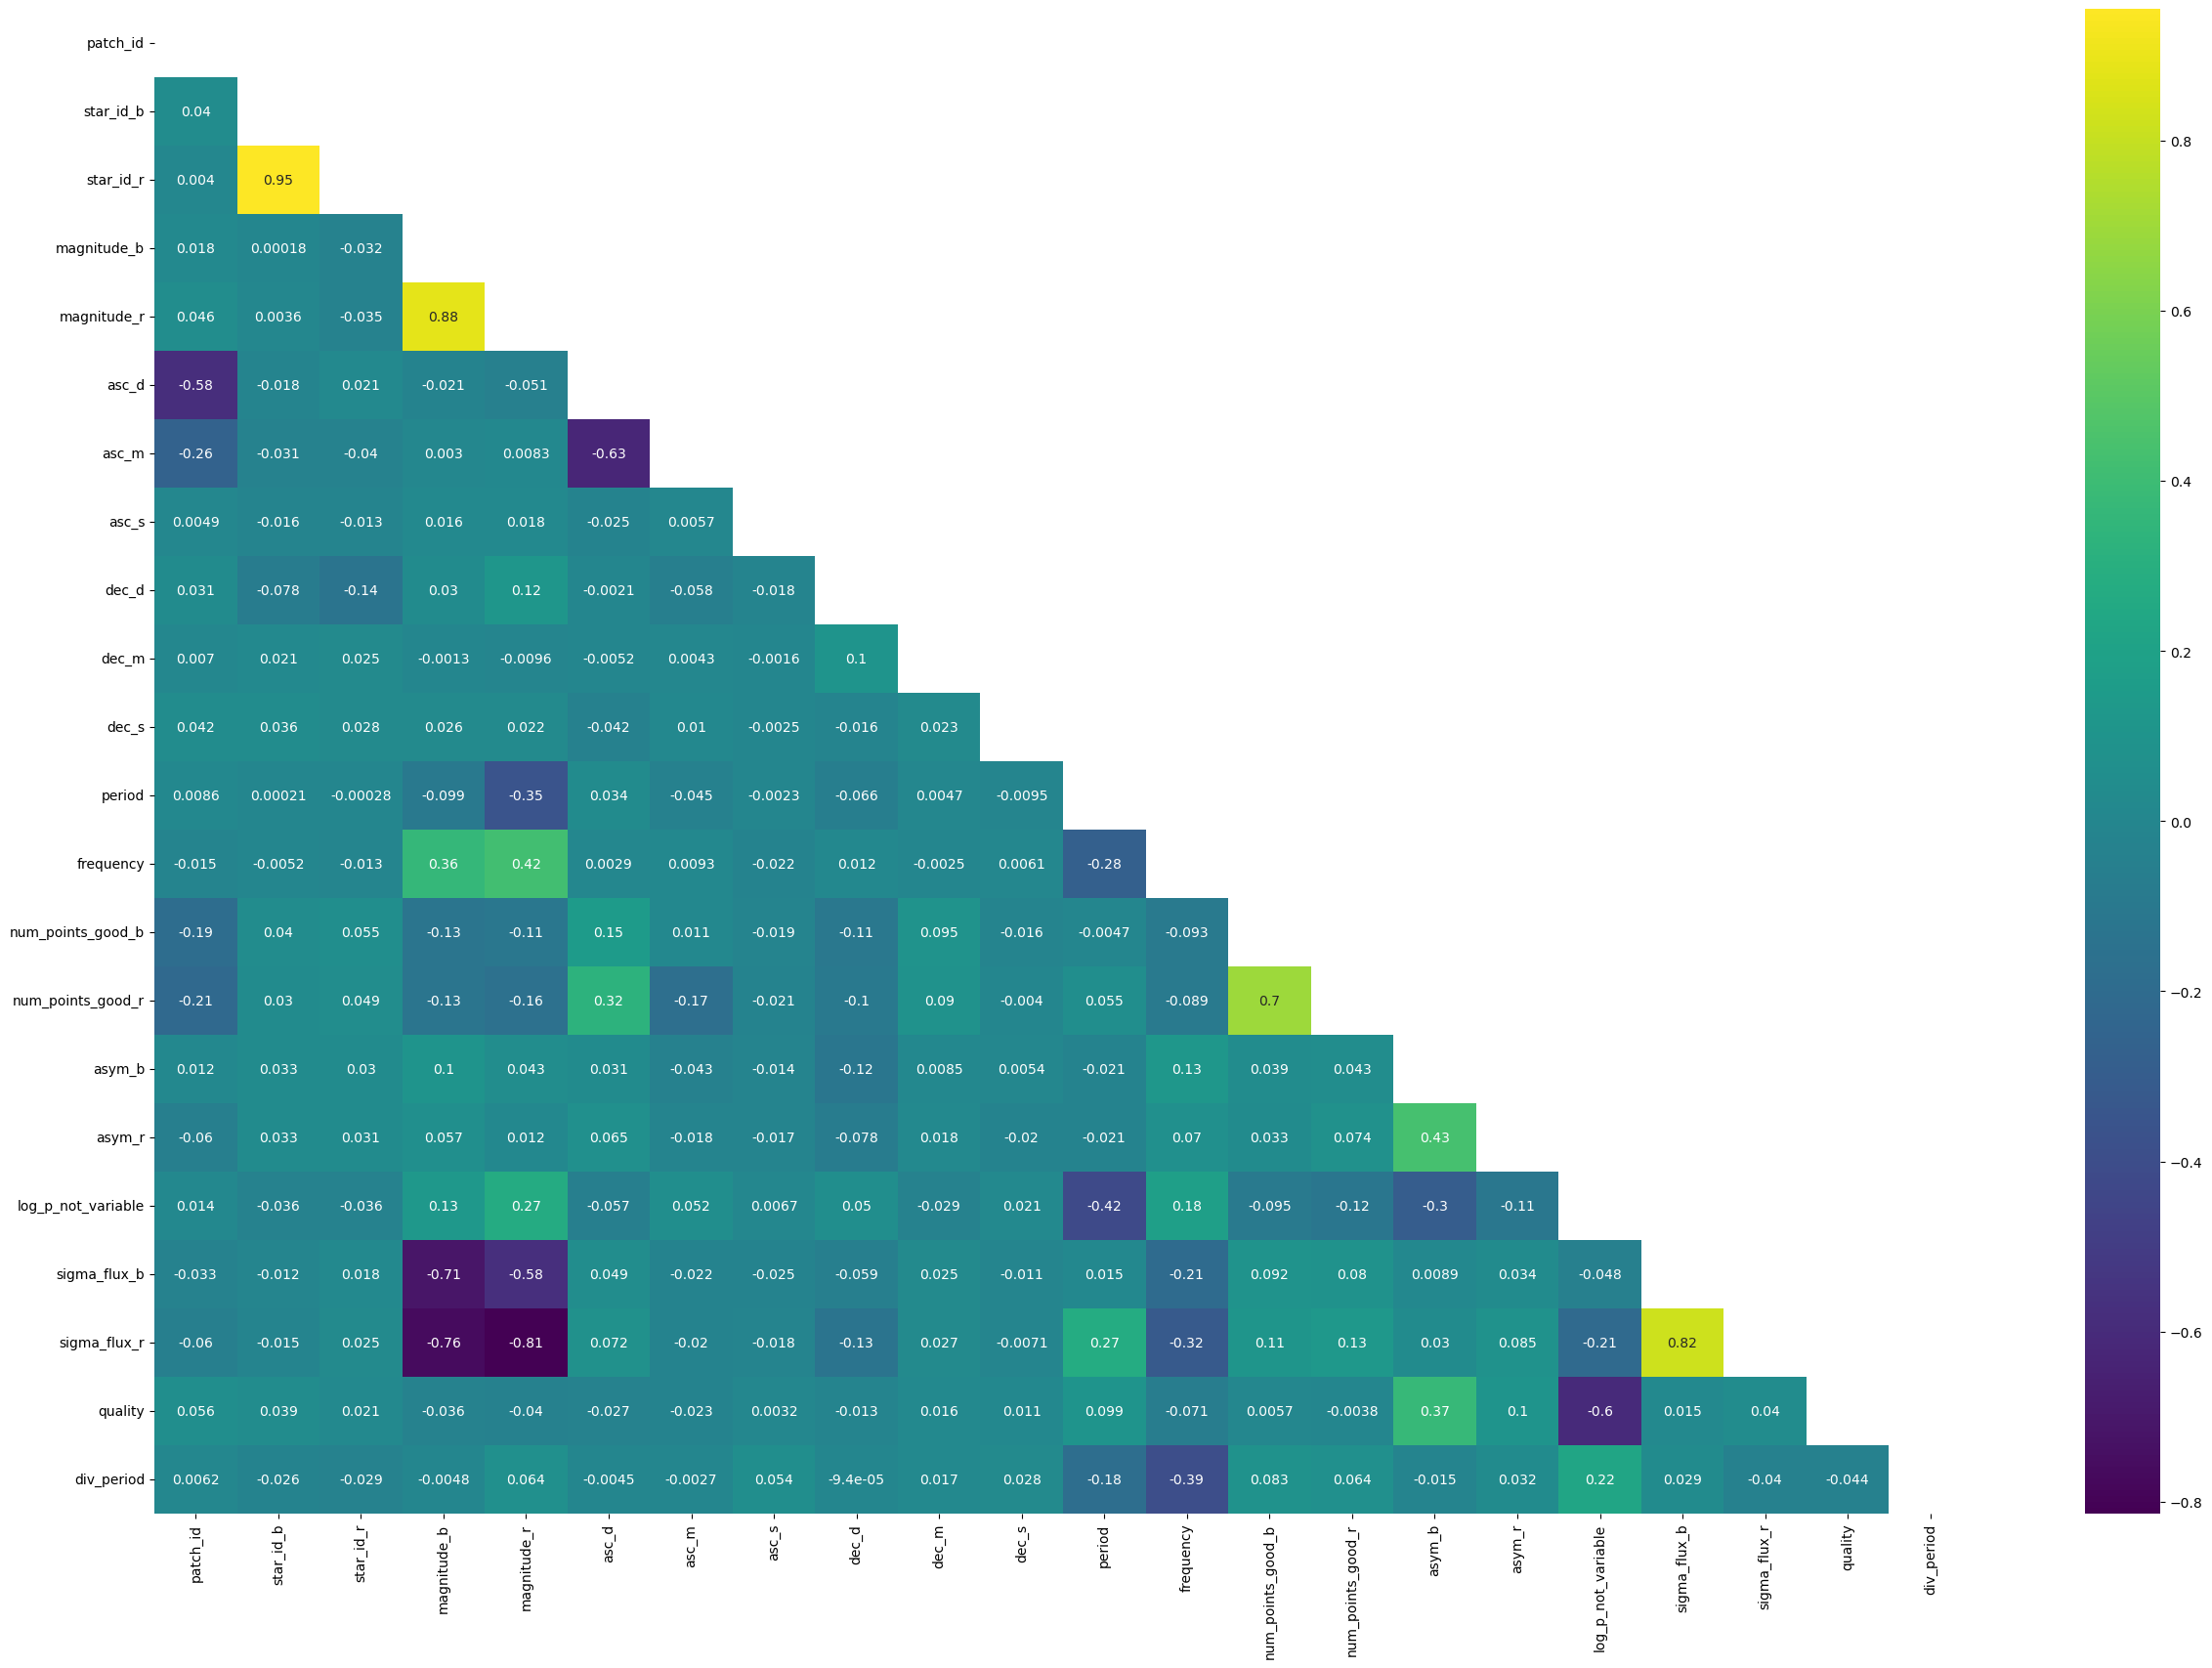

In [24]:
plt.figure(figsize=(30, 20))
mask = np.triu(np.ones_like(X_df.corr(numeric_only=True), dtype=bool))
ax = sns.heatmap(
    X_df.corr(numeric_only=True),
    cbar=True,
    annot=True,
    cmap="viridis",
    mask=mask,
)

Comment: There are some few correlations but it seems to be logic correlation for example the magnitude_b with sigma_flux_b. However this correlation doesn't force us to delete this correlation (deleting one of the correlated features) because both features are likelly to be revelant for the classificatin task. 


**2. Promissing transformations:**

    1- Data cleaning: delete the non values or impute them: at this stage there is not missing values but in the future when we handle the data series we will create some nan values 

    2- Feature selection: drop irrevelant features

    3- handling categorical data if exists 

    3- Create & add new revelant features 

    4- Decompose features: transform the data series features into usable data 

    5- here new nan values will appear so impute them (imputer and a strategy)

    6- feature scaling (aka normalization)

All these steps will be coded in a pipeline. 

In [ ]:
selected_static_features = [
    'period',
    'asym_b',
    'asym_r',
    'log_p_not_variable',
    'sigma_flux_b',
    'sigma_flux_r',
    'div_period',
    'magnitude_b',
    'magnitude_r',
    'asc_d',
    'asc_m',
    'asc_s',
    'dec_d',
    'dec_m',
    'dec_s',
    'frequency',
    'num_points_good_b',
    'num_points_good_r',
    'quality',
    'patch_id', # only for identification of the stars
    'star_id_b', # only for identification of the stars
    'star_id_r' # only for identification of the stars
]

to_added_features = [
    'real_period',
    # 'log_real_period',
]